In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model,Sequential
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
dataframe = pd.read_csv("/content/housing.csv",delim_whitespace = True,header=None)
dataset = dataframe.values

x = dataset[:,0:13]
y = dataset[:, 13]

x = StandardScaler().fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
dataset.shape

(506, 14)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
model = Sequential()
model.add(Input(shape=x_train.shape[1]))
model.add(Dense(128,activation='tanh',kernel_regularizer='L2'))
model.add(Dense(64,activation='relu',kernel_regularizer='L2'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(Dense(16,activation='tanh',kernel_regularizer='L2'))
model.add(Dense(4,activation='relu',kernel_regularizer='L2'))
model.add(Dense(1))

model.build(input_shape=x_train.shape)


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               1792      
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 16)                1040      
                                                                 
 dense_20 (Dense)            (None, 4)                 68        
                                                                 
 dense_21 (Dense)            (None, 1)                 5         
                                                                 
Total params: 11,161
Trainable params: 11,161
Non-trai

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.mean_squared_error,metrics=tf.keras.metrics.mean_squared_error)


In [ ]:
model_fitting = model.fit(x_train,y_train,batch_size=10,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/75
33/33 [==============================] - 1s 6ms/step - loss: 558.6886 - mean_squared_error: 557.2746 - val_loss: 420.1050 - val_mean_squared_error: 418.6718
Epoch 2/75
33/33 [==============================] - 0s 2ms/step - loss: 416.7254 - mean_squared_error: 415.2625 - val_loss: 309.7720 - val_mean_squared_error: 308.2745
Epoch 3/75
33/33 [==============================] - 0s 2ms/step - loss: 327.0416 - mean_squared_error: 325.5179 - val_loss: 247.9987 - val_mean_squared_error: 246.4490
Epoch 4/75
33/33 [==============================] - 0s 3ms/step - loss: 268.2118 - mean_squared_error: 266.6443 - val_loss: 201.4635 - val_mean_squared_error: 199.8795
Epoch 5/75
33/33 [==============================] - 0s 3ms/step - loss: 223.0127 - mean_squared_error: 221.4178 - val_loss: 165.0921 - val_mean_squared_error: 163.4867
Epoch 6/75
33/33 [==============================] - 0s 3ms/step - loss: 187.9016 - mean_squared_error: 186.2877 - val_loss: 135.9383 - val_mean_squared_error: 1

In [ ]:
# model_fitting = model.fit(x_train,y_train,batch_size=10,epochs=50,verbose=1,validation_split=0.2)

In [ ]:
# model_fitting = model.fit(x_train,y_train,batch_size=10,epochs=20,verbose=1,validation_split=0.2)

In [ ]:
from sklearn.metrics import r2_score

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(r2_score(train_pred,y_train))
print(r2_score(test_pred,y_test))

4/4 [==============================] - 0s 2ms/step
0.927798494419635
0.8444566383408155


In [ ]:
from sklearn.metrics import r2_score

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(r2_score(train_pred,y_train))
print(r2_score(test_pred,y_test))

4/4 [==============================] - 0s 3ms/step
0.9485390784591132
0.8270506219874966


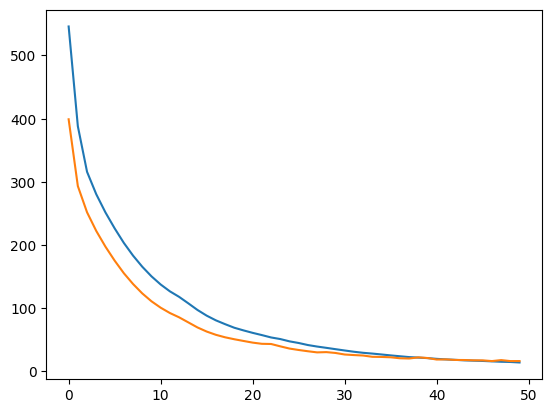

In [ ]:
plt.plot(model_fitting.history['loss'])
plt.plot(model_fitting.history['val_loss'])

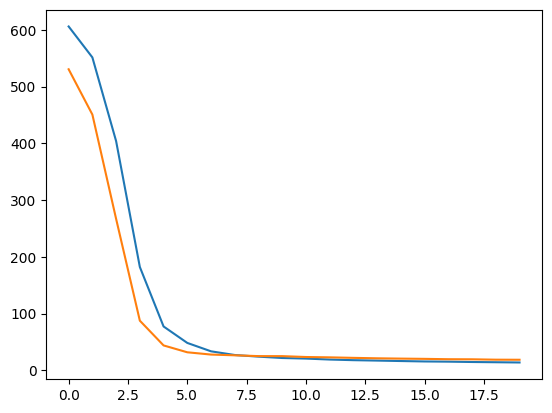

In [ ]:
plt.plot(model_fitting.history['mean_squared_error'])
plt.plot(model_fitting.history['val_mean_squared_error'])